# WeatherPy - OBN

### Analysis:
* insight 1
* insight 2
* insight 3

In [90]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint
import datetime

#Current date/time
datetime = datetime.datetime.now()

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [117]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

636

## Perform API Calls

In [119]:
# OpenWeatherMap API Key
api_key = api_keys.api_key

# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 

weather = []
final_cities = []

city_number = 1

for city in cities:
    target_url = url + "&q=" + city
    response = requests.get(target_url).json()
    
    if response != {'cod': '404', 'message': 'city not found'}:
        weather.append(response)
        print(f'Retrieving weather data for city number {city_number}: {city}') 
        city_number = city_number + 1
        final_cities.append(city)
    else:
        print(f'City not found, skipping city: {city}')
    

Retrieving weather data for city number 1: rikitea
Retrieving weather data for city number 2: hyderabad
Retrieving weather data for city number 3: norton
Retrieving weather data for city number 4: praia da vitoria
Retrieving weather data for city number 5: orgita
Retrieving weather data for city number 6: barbastro
Retrieving weather data for city number 7: dudinka
Retrieving weather data for city number 8: saint anthony
Retrieving weather data for city number 9: mataura
Retrieving weather data for city number 10: punta arenas
Retrieving weather data for city number 11: georgetown
Retrieving weather data for city number 12: olga
Retrieving weather data for city number 13: baiyin
Retrieving weather data for city number 14: stilfontein
Retrieving weather data for city number 15: bayanday
Retrieving weather data for city number 16: hobart
Retrieving weather data for city number 17: vaini
Retrieving weather data for city number 18: mangai
Retrieving weather data for city number 19: necoche

Retrieving weather data for city number 142: kirakira
Retrieving weather data for city number 143: les cayes
Retrieving weather data for city number 144: bocaiuva
Retrieving weather data for city number 145: panama city
Retrieving weather data for city number 146: muroran
City not found, skipping city: taburao
Retrieving weather data for city number 147: san policarpo
Retrieving weather data for city number 148: lar
Retrieving weather data for city number 149: sao filipe
Retrieving weather data for city number 150: cockburn town
City not found, skipping city: taolanaro
Retrieving weather data for city number 151: lebu
Retrieving weather data for city number 152: angoche
Retrieving weather data for city number 153: pontian kecil
Retrieving weather data for city number 154: kholtoson
Retrieving weather data for city number 155: bouna
Retrieving weather data for city number 156: arvika
Retrieving weather data for city number 157: hasaki
Retrieving weather data for city number 158: hay riv

Retrieving weather data for city number 284: ballina
Retrieving weather data for city number 285: makakilo city
City not found, skipping city: ust-kamchatsk
Retrieving weather data for city number 286: ahipara
Retrieving weather data for city number 287: novikovo
Retrieving weather data for city number 288: vostok
Retrieving weather data for city number 289: khor
Retrieving weather data for city number 290: port macquarie
Retrieving weather data for city number 291: sangmelima
City not found, skipping city: grand river south east
Retrieving weather data for city number 292: nanortalik
Retrieving weather data for city number 293: naruto
Retrieving weather data for city number 294: bethel
Retrieving weather data for city number 295: port blair
Retrieving weather data for city number 296: saint-augustin
Retrieving weather data for city number 297: pouembout
Retrieving weather data for city number 298: henties bay
Retrieving weather data for city number 299: adrar
Retrieving weather data f

Retrieving weather data for city number 421: ornskoldsvik
Retrieving weather data for city number 422: kudahuvadhoo
City not found, skipping city: paradwip
Retrieving weather data for city number 423: alyangula
Retrieving weather data for city number 424: utete
Retrieving weather data for city number 425: dobryanka
Retrieving weather data for city number 426: kimbe
Retrieving weather data for city number 427: muriwai beach
Retrieving weather data for city number 428: buluang
Retrieving weather data for city number 429: gornozavodsk
City not found, skipping city: rungata
Retrieving weather data for city number 430: yatou
Retrieving weather data for city number 431: solwezi
Retrieving weather data for city number 432: narang
Retrieving weather data for city number 433: sinazongwe
Retrieving weather data for city number 434: clyde river
Retrieving weather data for city number 435: watsa
Retrieving weather data for city number 436: teguise
Retrieving weather data for city number 437: miles

Retrieving weather data for city number 564: anadyr
Retrieving weather data for city number 565: sur
Retrieving weather data for city number 566: awbari
Retrieving weather data for city number 567: corpus christi
Retrieving weather data for city number 568: jumla
Retrieving weather data for city number 569: katiola
Retrieving weather data for city number 570: williams lake
Retrieving weather data for city number 571: hailey
Retrieving weather data for city number 572: tam ky
Retrieving weather data for city number 573: kattivakkam
Retrieving weather data for city number 574: aksay


In [120]:
#weather response format for reference
pprint(weather[0])

{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': -23.12, 'lon': -134.97},
 'dt': 1538536717,
 'id': 4030556,
 'main': {'grnd_level': 1032.11,
          'humidity': 100,
          'pressure': 1032.11,
          'sea_level': 1032.24,
          'temp': 67.58,
          'temp_max': 67.58,
          'temp_min': 67.58},
 'name': 'Rikitea',
 'rain': {'3h': 0.295},
 'sys': {'country': 'PF',
         'message': 0.0043,
         'sunrise': 1538577487,
         'sunset': 1538621985},
 'weather': [{'description': 'light rain',
              'icon': '10n',
              'id': 500,
              'main': 'Rain'}],
 'wind': {'deg': 155.001, 'speed': 19.84}}


In [121]:
#create lists for comparisons
lats = []
temps = []
humidities = []
clouds = []
wind_speeds = []

index = 0

for city in weather:
    lats.append(weather[index]["coord"]["lat"])
    temps.append(weather[index]["main"]["temp"])
    humidities.append(weather[index]["main"]["humidity"])
    clouds.append(weather[index]["clouds"]["all"])
    wind_speeds.append(weather[index]["wind"]["speed"])
    index = index + 1
    

## Temperature Analysis

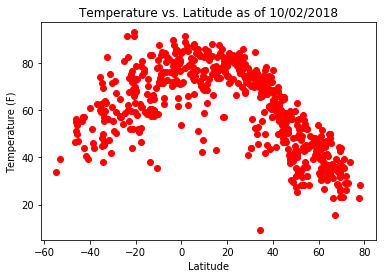

In [132]:
plt.scatter(lats,temps,marker="o",color="red")
plt.title(f'Temperature vs. Latitude as of {datetime.strftime("%m/%d/%Y")}')
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")

plt.savefig("output_data/temperature.png")

## Humidity Analysis

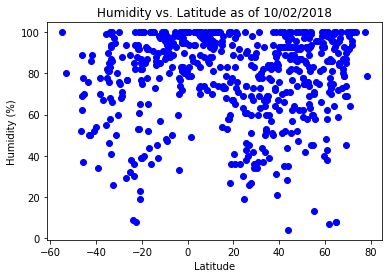

In [133]:
plt.scatter(lats,humidities,marker="o",color="blue")
plt.title(f'Humidity vs. Latitude as of {datetime.strftime("%m/%d/%Y")}')
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

plt.savefig("output_data/humidity.png")

## Cloudiness Analysis

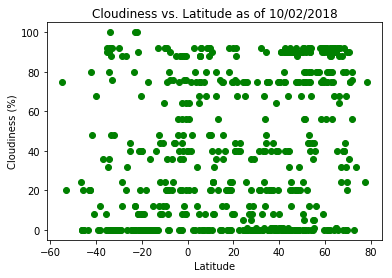

In [134]:
plt.scatter(lats,clouds,marker="o",color="green")
plt.title(f'Cloudiness vs. Latitude as of {datetime.strftime("%m/%d/%Y")}')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

plt.savefig("output_data/cloudiness.png")

## Wind Speed Analysis

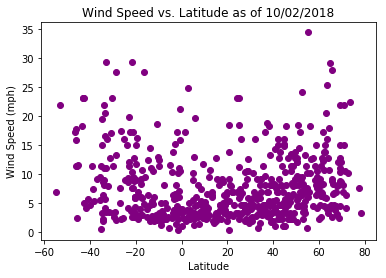

In [135]:
plt.scatter(lats,wind_speeds,marker="o",color="purple")
plt.title(f'Wind Speed vs. Latitude as of {datetime.strftime("%m/%d/%Y")}')
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

plt.savefig("output_data/wind_speed.png")

## Save Full Dataset

In [136]:
weather_df = pd.DataFrame({"City":final_cities,
                           "Latitude":lats,
                            "Temperature":temps,
                            "Humidity":humidities,
                            "Cloudiness":clouds,
                            "Wind Speed":wind_speeds})

weather_df.head()

weather_df.to_csv(output_data_file)